# SOEN 6611 (SOFTWARE MEASUREMENT: THEORY AND PRACTICE) 
# STEP 5
# Submitted By : 
# Geetika Rathi (40206213)
# Harman Preet Kaur (40198317)
# Shubhang Khattar (40163063)

In [1]:
#Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#Reading CSV to PD Dataframe
df = pd.read_csv('/Users/shubhangkhattar/Desktop/SOEN 6611/SOEN Project/Dataset_Superhero-TV-Shows.csv')

In [3]:
#Checking if data loaded succesfully 
df.head()

,show_title,imdb_rating,release_year,runtime,genre,parental_guideline,imdb_votes,synopsis
0,Peacemaker,8.5,2022-,40,"Action, Adventure, Comedy",TV-MA,"60,116",Picking up where The Suicide Squad (2021) left...
1,The Legend of Vox Machina,8.6,2022-,30,"Animation, Action, Adventure",TV-MA,"13,128",In a desperate attempt to pay off a mounting b...
2,Daredevil,8.6,2015-2018,54,"Action, Crime, Drama",TV-MA,"4,10,433","A blind lawyer by day, vigilante by night. Mat..."
3,The Boys,8.7,2019-,60,"Action, Crime, Drama",TV-MA,"3,47,831",A group of vigilantes set out to take down cor...
4,Raising Dion,7.2,2019-,50,"Drama, Sci-Fi",TV-G,"13,375",A widowed single mom discovers that her son ha...


# Extraction Phase

In [4]:
#Splitting the datasource quality analysis
df_1 = df.iloc[:200,:]  #t1
df_2 = df.iloc[201:449,:]  #t2
df_3 = df.iloc[450:,:]  #t3


# Saving the dataframe
df_1.to_csv("extraction_df1.csv")
df_2.to_csv("extraction_df2.csv")
df_3.to_csv("extraction_df3.csv")

print("Shape of new dataframes - {} , {},{}".format(df_1.shape, df_2.shape,df_3.shape))

Shape of new dataframes - (200, 8) , (248, 8),(300, 8)


In [5]:
# Length of big data
print ("Lenght of big data set (lbdt) : {}".format(len(df)))

Lenght of big data set (lbdt) : 750


In [6]:
# Function to calculate veracity
def get_veracity(dataset,df_name,phase):
    
    # Calculating pj
    print("\n","*" * 10, "Calculating veracity for {} in {} phase".format(df_name,phase),"*"*10)
    
    unique_list = dict()

    pj_total = 0

    for i in dataset.to_numpy().flatten():
        count = unique_list.get(i,0) + 1
        unique_list[i] = count

    for i in unique_list.values():
        pj_total += i * np.log2(i)

    
    h_acc=np.log2(len(dataset)) - (1/(len(dataset) * pj_total))
    h_max=np.log2(len(dataset))
    
    # Calculating accuracy
    accuracy = h_acc/h_max
    
    print("Accuracy for {} in {} phase : {}".format(df_name,phase,accuracy))
    
    # Calculating not null values.
    not_null_df = len(dataset.dropna())
    lbd_df = len(dataset)
    
    # Calculating completeness
    completeness = not_null_df/lbd_df
    
    print("Completeness for {} in {} phase : {}".format(df_name,phase,completeness))

    # Assuming that the rows having release year as TBA are outliers.
    curr_rec_df = len(dataset) - len(dataset[dataset['release_year'] == 'TBA'])
    
    # Calculating currentness
    currentness = curr_rec_df / len(dataset)
    
    num_succesfull_request = 1
    total_request = 1
    
    # Calculating availability
    availability = num_succesfull_request / total_request
    
    print("Currentness for {} in {} phase : {}".format(df_name,phase,currentness))
    
    
    # Calculating accuracy considering availability as 0.
    veracity = accuracy * (1/3) + completeness * (1/3) + currentness * (1/3) + availability * (0)
    
    
    print("Veracity for {} in {} phase : {}".format(df_name,phase,veracity))


    return veracity


 ********** Calculating veracity for time frame 1 in Extraction phase **********
Accuracy for time frame 1 in Extraction phase : 0.9999998121994819
Completeness for time frame 1 in Extraction phase : 0.91
Currentness for time frame 1 in Extraction phase : 0.975
Veracity for time frame 1 in Extraction phase : 0.9616666040664938

 ********** Calculating veracity for time frame 2 in Extraction phase **********
Accuracy for time frame 2 in Extraction phase : 0.9999998850916777
Completeness for time frame 2 in Extraction phase : 0.7459677419354839
Currentness for time frame 2 in Extraction phase : 0.9758064516129032
Veracity for time frame 2 in Extraction phase : 0.9072580262133549

 ********** Calculating veracity for time frame 3 in Extraction phase **********
Accuracy for time frame 3 in Extraction phase : 0.9999999325875082
Completeness for time frame 3 in Extraction phase : 0.54
Currentness for time frame 3 in Extraction phase : 0.97
Veracity for time frame 3 in Extraction phase : 0.8

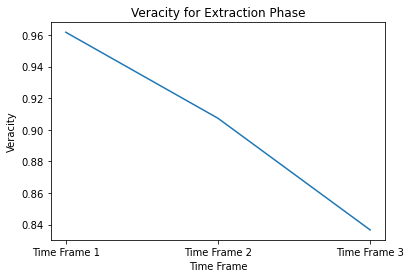

In [7]:
# Calculating veracity for different data frames
Mver_df1 = get_veracity(df_1,"time frame 1","Extraction")
Mver_df2 = get_veracity(df_2,"time frame 2","Extraction")
Mver_df3 = get_veracity(df_3,"time frame 3","Extraction")


# Plotting the graph for Veracity.
dataatextraction = ['Time Frame 1','Time Frame 2','Time Frame 3']
dataatextraction_data = [Mver_df1,Mver_df2,Mver_df3]

plt.plot(dataatextraction,dataatextraction_data)
plt.title('Veracity for Extraction Phase')
plt.xlabel('Time Frame')
plt.ylabel('Veracity')
plt.show()

In [8]:
# Calculating validity for different data frames
def get_validity(dataset,df_name,phase):
    
    print("\n","*" * 10, "Calculating validity for {} in {} phase".format(df_name,phase),"*"*10)
    
    
    # As the dataset is all about imdb ratings, the rows without imdb ratings are not consider compliant.
    compliant_rec = len(dataset["imdb_rating"].dropna())
    lbd_df = len(dataset)
    
    # Calculating Compliance
    compliance= compliant_rec/lbd_df
    print("Compliance for {} in {} phase : {}".format(df_name,phase,compliance))
    
    #Number of credible dataset we have is 1. 
    nds_cred = 1
    nds = 1

    
    # Calculating Credibility
    credibility = nds_cred/nds
    
    print("Credibility for {} in {} phase : {}".format(df_name,phase,credibility))
    
    validity = compliance * (1/2) + credibility * (1/2)
    
    print("Vailidty for {} in {} phase : {}".format(df_name,phase,validity))
    
    return validity



 ********** Calculating validity for time frame 1 in Extraction phase **********
Compliance for time frame 1 in Extraction phase : 0.96
Credibility for time frame 1 in Extraction phase : 1.0
Vailidty for time frame 1 in Extraction phase : 0.98

 ********** Calculating validity for time frame 2 in Extraction phase **********
Compliance for time frame 2 in Extraction phase : 0.9838709677419355
Credibility for time frame 2 in Extraction phase : 1.0
Vailidty for time frame 2 in Extraction phase : 0.9919354838709677

 ********** Calculating validity for time frame 3 in Extraction phase **********
Compliance for time frame 3 in Extraction phase : 0.99
Credibility for time frame 3 in Extraction phase : 1.0
Vailidty for time frame 3 in Extraction phase : 0.995


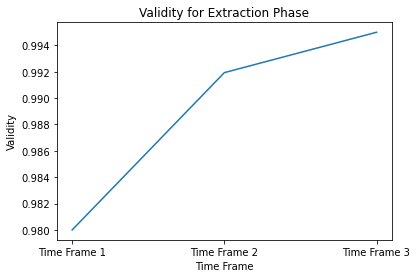

In [9]:
# Calculating validity for different data frames

Mval_df1 = get_validity(df_1,"time frame 1","Extraction")
Mval_df2 = get_validity(df_2,"time frame 2","Extraction")
Mval_df3 = get_validity(df_3,"time frame 3","Extraction")


# Plotting the graph for Validity.
dataatextraction = ['Time Frame 1','Time Frame 2','Time Frame 3']
dataatextraction_data = [Mval_df1,Mval_df2,Mval_df3]

# Plotting graph for Validity
plt.plot(dataatextraction,dataatextraction_data)
plt.title('Validity for Extraction Phase')
plt.xlabel('Time Frame')
plt.ylabel('Validity')
plt.show()

In [10]:
# Fucntion to calculate vincularity for different data frames
def get_vincularity(dataset,df_name,phase):
    
    print("\n","*" * 10, "Calculating traceability for {} in {} phase".format(df_name,phase),"*"*10)
    
    # assuming records without show_title as not traceable.
    traceability_rec = len(dataset["show_title"].notna())
    
    # calculatig traceability/
    traceability = traceability_rec/len(dataset)
    
    print("Traceability for {} in {} phase : {}".format(df_name,phase,traceability))
    
     # Calculating vincularity
    vincularity = traceability/1
    
    print("Vincularity for {} in {} phase : {}".format(df_name,phase,vincularity))
    
    return vincularity
    


 ********** Calculating traceability for time frame 1 in Extraction phase **********
Traceability for time frame 1 in Extraction phase : 1.0
Vincularity for time frame 1 in Extraction phase : 1.0

 ********** Calculating traceability for time frame 2 in Extraction phase **********
Traceability for time frame 2 in Extraction phase : 1.0
Vincularity for time frame 2 in Extraction phase : 1.0

 ********** Calculating traceability for time frame 3 in Extraction phase **********
Traceability for time frame 3 in Extraction phase : 1.0
Vincularity for time frame 3 in Extraction phase : 1.0


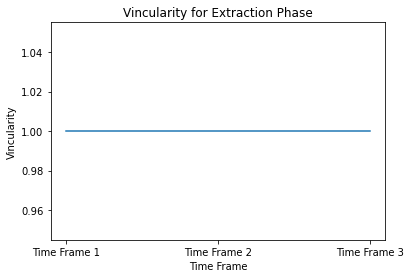

In [11]:
# Calculating vincularity for different data frames

Mvin_df1 = get_vincularity(df_1,"time frame 1","Extraction")
Mvin_df2 = get_vincularity(df_2,"time frame 2","Extraction")
Mvin_df3 = get_vincularity(df_3,"time frame 3","Extraction")

# Plotting the graph for Vincularity.
dataatextraction = ['Time Frame 1','Time Frame 2','Time Frame 3']
dataatextraction_data = [Mvin_df1,Mvin_df2,Mvin_df3]

plt.plot(dataatextraction,dataatextraction_data)
plt.title('Vincularity for Extraction Phase')
plt.xlabel('Time Frame')
plt.ylabel('Vincularity')
plt.show()

# Pre-processing 

In [12]:

# for pre-processing we are removing the rows having column "imdb_rating" as null

df_1 = df_1.dropna(axis=0, subset=['imdb_rating'])
df_1 = df_1[df_1.imdb_rating != "Not-Rated"]

df_2 = df_2.dropna(axis=0, subset=['imdb_rating'])
df_2 = df_2[df_2.imdb_rating != "Not-Rated"]

df_3 = df_3.dropna(axis=0, subset=['imdb_rating'])
df_3 = df_3[df_3.imdb_rating != "Not-Rated"]

In [13]:
# Saving pre-processed files

df_1.to_csv("pre_processing_df1.csv")
df_2.to_csv("pre_processing_df2.csv")
df_3.to_csv("pre_processing_df3.csv")


 ********** Calculating veracity for time frame 1 in Preprocessing phase **********
Accuracy for time frame 1 in Preprocessing phase : 0.9999997696838037
Completeness for time frame 1 in Preprocessing phase : 0.9732620320855615
Currentness for time frame 1 in Preprocessing phase : 1.0
Veracity for time frame 1 in Preprocessing phase : 0.991087267256455

 ********** Calculating veracity for time frame 2 in Preprocessing phase **********
Accuracy for time frame 2 in Preprocessing phase : 0.999999868364668
Completeness for time frame 2 in Preprocessing phase : 0.7773109243697479
Currentness for time frame 2 in Preprocessing phase : 1.0
Veracity for time frame 2 in Preprocessing phase : 0.9257702642448051

 ********** Calculating veracity for time frame 3 in Preprocessing phase **********
Accuracy for time frame 3 in Preprocessing phase : 0.9999999231879829
Completeness for time frame 3 in Preprocessing phase : 0.5625
Currentness for time frame 3 in Preprocessing phase : 1.0
Veracity for 

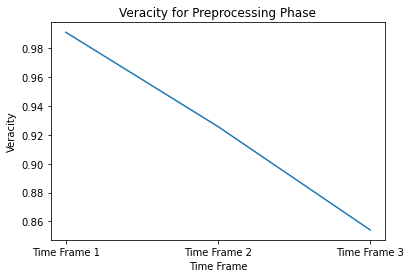

In [14]:
# Calculating veracity of various data frames 


Mver_df1 = get_veracity(df_1,"time frame 1","Preprocessing")
Mver_df2 = get_veracity(df_2,"time frame 2","Preprocessing")
Mver_df3 = get_veracity(df_3,"time frame 3","Preprocessing")

# Plotting graph for veracity
dataatextraction = ['Time Frame 1','Time Frame 2','Time Frame 3']
dataatextraction_data = [Mver_df1,Mver_df2,Mver_df3]

plt.plot(dataatextraction,dataatextraction_data)
plt.title('Veracity for Preprocessing Phase')
plt.xlabel('Time Frame')
plt.ylabel('Veracity')
plt.show()


 ********** Calculating validity for time frame 1 in Preprocessing phase **********
Compliance for time frame 1 in Preprocessing phase : 1.0
Credibility for time frame 1 in Preprocessing phase : 1.0
Vailidty for time frame 1 in Preprocessing phase : 1.0

 ********** Calculating validity for time frame 2 in Preprocessing phase **********
Compliance for time frame 2 in Preprocessing phase : 1.0
Credibility for time frame 2 in Preprocessing phase : 1.0
Vailidty for time frame 2 in Preprocessing phase : 1.0

 ********** Calculating validity for time frame 3 in Preprocessing phase **********
Compliance for time frame 3 in Preprocessing phase : 1.0
Credibility for time frame 3 in Preprocessing phase : 1.0
Vailidty for time frame 3 in Preprocessing phase : 1.0


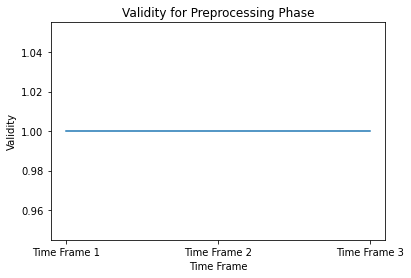

In [15]:
# Calculating the validity of different time frames

Mval_df1 = get_validity(df_1,"time frame 1","Preprocessing")
Mval_df2 = get_validity(df_2,"time frame 2","Preprocessing")
Mval_df3 = get_validity(df_3,"time frame 3","Preprocessing")

# Plotting graph for validity
dataatextraction = ['Time Frame 1','Time Frame 2','Time Frame 3']
dataatextraction_data = [Mval_df1,Mval_df2,Mval_df3]

plt.plot(dataatextraction,dataatextraction_data)
plt.title('Validity for Preprocessing Phase')
plt.xlabel('Time Frame')
plt.ylabel('Validity')
plt.show()


 ********** Calculating traceability for time frame 1 in Preprocessing phase **********
Traceability for time frame 1 in Preprocessing phase : 1.0
Vincularity for time frame 1 in Preprocessing phase : 1.0

 ********** Calculating traceability for time frame 2 in Preprocessing phase **********
Traceability for time frame 2 in Preprocessing phase : 1.0
Vincularity for time frame 2 in Preprocessing phase : 1.0

 ********** Calculating traceability for time frame 3 in Preprocessing phase **********
Traceability for time frame 3 in Preprocessing phase : 1.0
Vincularity for time frame 3 in Preprocessing phase : 1.0


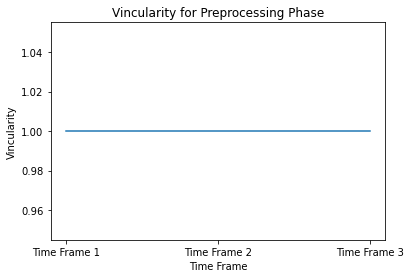

In [16]:
# Calculating the vincularity of different time frames

Mvin_df1 = get_vincularity(df_1,"time frame 1","Preprocessing")
Mvin_df2 = get_vincularity(df_2,"time frame 2","Preprocessing")
Mvin_df3 = get_vincularity(df_3,"time frame 3","Preprocessing")


# plotting graph for vincularity
dataatextraction = ['Time Frame 1','Time Frame 2','Time Frame 3']
dataatextraction_data = [Mvin_df1,Mvin_df2,Mvin_df3]

plt.plot(dataatextraction,dataatextraction_data)
plt.title('Vincularity for Preprocessing Phase')
plt.xlabel('Time Frame')
plt.ylabel('Vincularity')
plt.show()

# Processing

In [17]:
# for Processing we are polluting the runtime with na values with mean and removing rows with runtime as TBA

df_1['runtime'] = df_1['runtime'].str.replace(',','')
runtime_mean = df_1.dropna(subset=['runtime'])['runtime'].astype(int).mean()
df_1['runtime'].fillna(runtime_mean, inplace=True)
df_1 = df_1[df_1.release_year != "TBA"]


df_2['runtime'] = df_2['runtime'].str.replace(',','')
runtime_mean = df_2.dropna(subset=['runtime'])['runtime'].astype(int).mean()
df_2['runtime'].fillna(runtime_mean, inplace=True)
df_2 = df_2[df_2.release_year != "TBA"]

df_3['runtime'] = df_3['runtime'].str.replace(',','')
runtime_mean = df_3.dropna(subset=['runtime'])['runtime'].astype(int).mean()
df_3['runtime'].fillna(runtime_mean, inplace=True)
df_3 = df_3[df_3.release_year != "TBA"]

# Saving processed data to files
df_1.to_csv("processing_df1.csv")
df_2.to_csv("processing_df2.csv")
df_3.to_csv("processing_df3.csv")


 ********** Calculating veracity for time frame 1 in Processing phase **********
Accuracy for time frame 1 in Processing phase : 0.999999769319795
Completeness for time frame 1 in Processing phase : 0.9893048128342246
Currentness for time frame 1 in Processing phase : 1.0
Veracity for time frame 1 in Processing phase : 0.9964348607180065

 ********** Calculating veracity for time frame 2 in Processing phase **********
Accuracy for time frame 2 in Processing phase : 0.9999998666065731
Completeness for time frame 2 in Processing phase : 0.8445378151260504
Currentness for time frame 2 in Processing phase : 1.0
Veracity for time frame 2 in Processing phase : 0.9481792272442078

 ********** Calculating veracity for time frame 3 in Processing phase **********
Accuracy for time frame 3 in Processing phase : 0.9999999211723685
Completeness for time frame 3 in Processing phase : 0.6493055555555556
Currentness for time frame 3 in Processing phase : 1.0
Veracity for time frame 3 in Processing ph

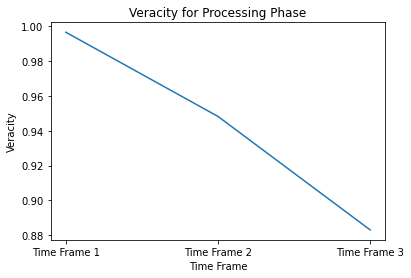

In [18]:
# Calculating veracity for different time frames.

Mver_df1 = get_veracity(df_1,"time frame 1","Processing")
Mver_df2 = get_veracity(df_2,"time frame 2","Processing")
Mver_df3 = get_veracity(df_3,"time frame 3","Processing")

# Plotting graph for veracity

dataatextraction = ['Time Frame 1','Time Frame 2','Time Frame 3']
dataatextraction_data = [Mver_df1,Mver_df2,Mver_df3]

plt.plot(dataatextraction,dataatextraction_data)
plt.title('Veracity for Processing Phase')
plt.xlabel('Time Frame')
plt.ylabel('Veracity')
plt.show()


 ********** Calculating validity for time frame 1 in Post_processing phase **********
Compliance for time frame 1 in Post_processing phase : 1.0
Credibility for time frame 1 in Post_processing phase : 1.0
Vailidty for time frame 1 in Post_processing phase : 1.0

 ********** Calculating validity for time frame 2 in Post_processing phase **********
Compliance for time frame 2 in Post_processing phase : 1.0
Credibility for time frame 2 in Post_processing phase : 1.0
Vailidty for time frame 2 in Post_processing phase : 1.0

 ********** Calculating validity for time frame 3 in Post_processing phase **********
Compliance for time frame 3 in Post_processing phase : 1.0
Credibility for time frame 3 in Post_processing phase : 1.0
Vailidty for time frame 3 in Post_processing phase : 1.0


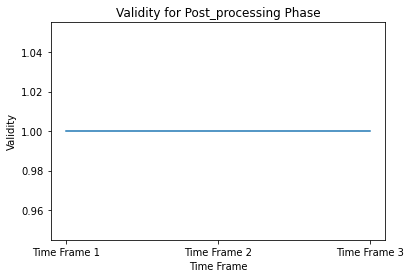

In [19]:

# Calculating validity for different time frames.

Mval_df1 = get_validity(df_1,"time frame 1","Post_processing")
Mval_df2 = get_validity(df_2,"time frame 2","Post_processing")
Mval_df3 = get_validity(df_3,"time frame 3","Post_processing")

# Plotting graph for validity
dataatextraction = ['Time Frame 1','Time Frame 2','Time Frame 3']
dataatextraction_data = [Mval_df1,Mval_df2,Mval_df3]

plt.plot(dataatextraction,dataatextraction_data)
plt.title('Validity for Post_processing Phase')
plt.xlabel('Time Frame')
plt.ylabel('Validity')
plt.show()


 ********** Calculating traceability for time frame 1 in Post_processing phase **********
Traceability for time frame 1 in Post_processing phase : 1.0
Vincularity for time frame 1 in Post_processing phase : 1.0

 ********** Calculating traceability for time frame 2 in Post_processing phase **********
Traceability for time frame 2 in Post_processing phase : 1.0
Vincularity for time frame 2 in Post_processing phase : 1.0

 ********** Calculating traceability for time frame 3 in Post_processing phase **********
Traceability for time frame 3 in Post_processing phase : 1.0
Vincularity for time frame 3 in Post_processing phase : 1.0


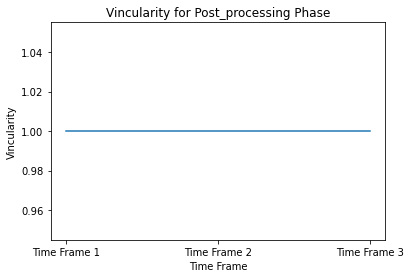

In [20]:
# Calculating vincularity for different time frames.


Mvin_df1 = get_vincularity(df_1,"time frame 1","Post_processing")
Mvin_df2 = get_vincularity(df_2,"time frame 2","Post_processing")
Mvin_df3 = get_vincularity(df_3,"time frame 3","Post_processing")


# Plotting graph for vincularity
dataatextraction = ['Time Frame 1','Time Frame 2','Time Frame 3']
dataatextraction_data = [Mvin_df1,Mvin_df2,Mvin_df3]

plt.plot(dataatextraction,dataatextraction_data)
plt.title('Vincularity for Post_processing Phase')
plt.xlabel('Time Frame')
plt.ylabel('Vincularity')
plt.show()